In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent

## Analytical gradient descent

In [2]:
def gradient_descent(x0, f, g, learning_rate=0.05, T=1000):
    """
    X: array of values
    f: function to apply
    g: gradient of the function
    learning_rate: Learning rate for each step
    T: number of iteration
    """
    x = x0
    t = 0
    while t <= T:
        x -= learning_rate * g(x)
        t +=1
    return x

In [3]:
def test_function(x):
    return 3*(x**2) + 4*x + 1

In [4]:
def test_function_gradient(x):
    return 6*x + 4

In [5]:
X = np.random.rand(10)

In [7]:
gradient_descent(10, test_function, test_function_gradient)

-0.6666666666666665

In [8]:
X

array([0.32898133, 0.54444417, 0.1240864 , 0.37420193, 0.97954549,
       0.16405347, 0.23631836, 0.40352342, 0.60919433, 0.82925444])

In [9]:
gradient_descent(X)

TypeError: gradient_descent() missing 2 required positional arguments: 'f' and 'g'

## Numerical gradient descent

In [10]:
def numerical_gradient_descent(x0,f,dx,learning_rate=0.05, T=1000):
    x = x0
    t = 0
    while t <= T:
        x -= learning_rate * (f(x + dx) - f(x)) / dx
        t+=1
    return x

In [11]:
numerical_gradient_descent(10, test_function, dx=0.01)

-0.6716666666666643

## Algorithmic Differentiation [with tensorflow]
- Check Tensorflow tutorial notebook about the use of the notebook.

In [12]:
def logistic_cost(ytrue, yhat):
    return np.log(1 + np.exp(-ytrue*yhat))

# Use rosenbrock's function to test gradient descent
# Compute gradient:
    # analytically
    # numerically
    # algorithmic differentiation

In [13]:
# Creating the stochastic gradient descent function
def stochastic_gradient_descent(X, ytrue, T=1000, epsilon=0.1, learning_rate=0.5): 
    nrow = len(ytrue)
    w = np.zeros(X.shape[1])  # initialisation du vecteur w avec les w_i = 0
    t = 0
    m = len(ytrue)
    
    cost = np.inf
    costs = []

    while (np.linalg.norm(np.gradient(cost)) > epsilon) or (t <= T):
        i = np.random.randint(nrow)
        y_t = ytrue[i] 
        X_t = X[i,:]
        prediction = np.dot(X_t.T, w)
        cost = np.sum(logistic_cost(prediction, y_t))
        costs.append(cost)
        w = w - learning_rate * (1/m * X_t.T.dot(prediction - y_t))
        t += 1 
    return w, costs 

In [ ]:
# def BGFS(X, y, cost_func, epsilon=0.1, T=1000):
#     d = X.shape[1]
#     wt = np.zeros(d)
#     B0 = np.identity(d, dtype=np.float64)
#     prediction = np.dot(X.T, w)
#     cost = np.sum(logistic_cost(prediction, y))
#     w = w - np.gradient(1/m * X.T.dot(prediction - y_t))
#     p0 = -1 * np.gradient(cost)
#     t = 0
#     wt_new = wt
    
#     while np.abs(wt - wt_new) <= epsilon * 
    
# def BGFS(X, y, cost_func, epsilon=0.1, T=1000):
#     d = X.shape[1]
#     w = np.zeros(d)
#     wp = w
#     B0 = np.identity(d, dtype=np.float64)
    
    
#     NewLoss = cost_func(wt, X)
#     g = np.gradient()
#     prediction = np.dot(X.T, w)
#     cost = np.sum(logistic_cost(prediction, y))
#     prev_cost = cost
#     w = w - np.gradient(1/m * X.T.dot(prediction - y))
#     g = 
#     p0 = -1 * np.gradient(cost)
#     t = 0
#     wt_new = wt
    
#     while np.abs(wt - wt_new) <= epsilon * 

In [9]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=25)

In [5]:
X.shape

(100, 25)

In [6]:
y.shape

(100,)

In [18]:
w

array([-0.19359975, -0.02257361,  0.09313582,  0.19779196,  0.29299544,
        0.08367926,  0.03667636,  0.05009537, -0.01661149, -0.00878274,
        0.29145733, -0.36510629,  0.37590629, -0.06468997, -0.05546188,
        0.2652245 ,  0.01802248,  0.35260599,  0.16291789,  0.17070718,
       -0.02609385, -0.28949568, -0.1605659 ,  0.15742504,  0.00573942])

In [18]:
t = np.array([i for i in range(1001)])

In [19]:
t.shape

(1001,)

In [20]:
len(costs)

1001

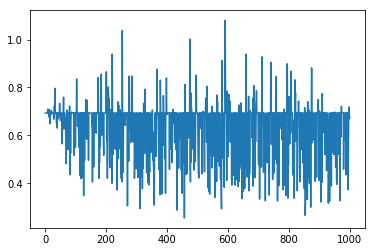

In [21]:
plt.plot(t, costs)

In [3]:
np.zeros(10).shape

(10,)

# Some classification algorithms

In [17]:
# Testing the code for the perceptron
eta = 0.1
n, d = X.shape
w = np.zeros(d)

n, d = X.shape
w = np.zeros(d)
w0 = 0.
t = 0
while t <= 100:
    i = np.random.randint(n)
    y_t = y[i] 
    X_t = X[i,:]
    if (y_t * (np.dot(w,X_t.T) + w0)) <= 0:
        w0 += eta*y_t
        w += eta * y_t * X_t
    else:
        w = w
    t +=1

In [11]:
# Perceptron function
def perceptron(X, y, eta=0.1, T=1000):
    n, d = X.shape
    w = np.zeros(d)
    n, d = X.shape
    w = np.zeros(d)
    w0 = 0.
    t = 0
    while t <= T:
        i = np.random.randint(n)
        y_t = y[i] 
        X_t = X[i,:]
        if (y_t * (np.dot(w,X_t.T) + w0)) <= 0:
            w0 += eta*y_t
            w += eta * y_t * X_t
        else:
            w = w
            w0 = w0
        t +=1
    return w, w0

In [14]:
w, w0 = perceptron(X, y)

In [32]:
(y[5] * w @ X[5].T + w0) / np.linalg.norm(w)

2.9758433157400876

In [40]:
activation = lambda x: 1 if x >0 else 0

In [43]:
activation(-6)

0

In [6]:
np.random.random(10)

array([0.1986317 , 0.31725294, 0.58070686, 0.11693641, 0.93201599,
       0.58055408, 0.38162891, 0.20343095, 0.07359161, 0.91957794])

In [46]:
# Trying to make the adaline algorithm
def adaline(X, y, eta=0.1, T=1000):
    n, d = X.shape
    w = np.random.random(d)
    w0 = 0
    t = 0
    h = 0
    while t <= T:
        i = np.random.randint(n)
        yt = y[i]
        Xt = X[i,:]
        h = w0 + np.dot(w,Xt.T)
        h = activation(h)
        w0 += eta*(yt - h)
        w += eta * (yt - h) * Xt
        t += 1
    return w, w0
    

In [47]:
adaline(X, y, T=1000)

(array([-1.06036228e-02,  4.03209240e-01, -2.79639867e-01, -9.91285892e-02,
         7.02710903e-02,  2.39968690e-01,  4.07756888e-02,  8.29421271e-01,
        -2.38973969e-01, -4.81040723e-01,  7.28099200e-01,  2.62684751e+00,
        -4.60356297e-01,  5.73880187e-01,  3.23100450e-01, -3.69506806e-01,
        -1.54382186e-01,  4.95485556e-01,  2.87166692e-01, -2.50065139e-01,
        -1.01653944e-01,  1.44675325e-02, -1.06761257e-01,  2.16266490e-01,
        -1.79380644e-03]), -0.4)